In [174]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [175]:
factory = PokemonFactory("pokemon.json")

In [176]:
pokeballs=["pokeball", "ultraball", "fastball", "heavyball"]
pokemon_names = ["jolteon","caterpie","snorlax","onix","mewtwo"]

def create_pokemons(names=pokemon_names,status=StatusEffect.NONE, level=100, life=1):
    pokemons=[]
    for name in names:
        pokemons.append(factory.create(name, level, status, life))
    return pokemons
    

# Ejercicio 1

### Item a

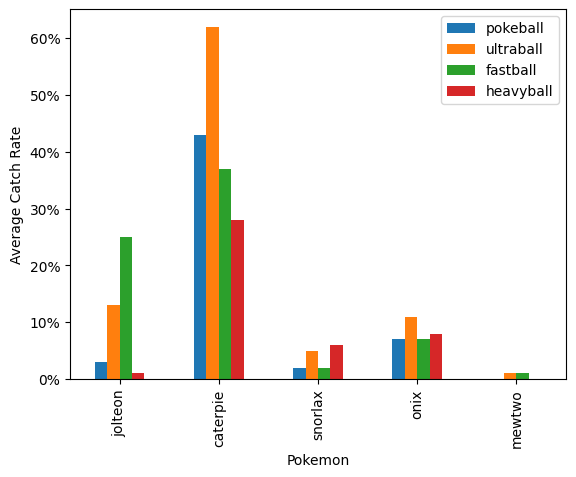

In [177]:
pokemons = create_pokemons()

def pokemon_stats():
    data = {pokeball: [] for pokeball in pokeballs}
    for pokeball in pokeballs:
        for pokemon in pokemons:
            results = []
            for _ in range(100):             
                results.append(attempt_catch(pokemon, pokeball)[0])
            average = sum(results) / len(results)*100
            data[pokeball].append(average)

    df = pd.DataFrame(data, index=pokemon_names)
    formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))

    ax = df.plot(kind='bar')
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel('Average Catch Rate')
    plt.xlabel('Pokemon')
    plt.show()

pokemon_stats()

### Item B

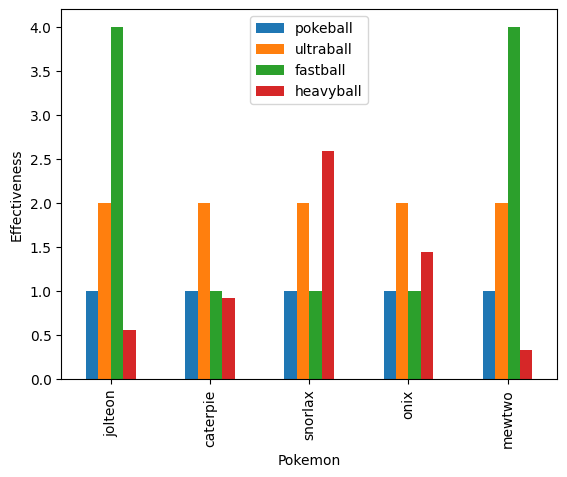

In [178]:
def pokeball_effectiveness():
    base_pokeball = "pokeball"
    data = {pokeball: [] for pokeball in pokeballs}
    for pokeball in pokeballs:
        for pokemon in pokemons:
            base_pokeball_catch_rate = attempt_catch(pokemon, base_pokeball)[1]
            catch_rate = attempt_catch(pokemon, pokeball)[1]
            effectiveness = catch_rate / base_pokeball_catch_rate
            data[pokeball].append(effectiveness)
    
    df = pd.DataFrame(data, index=pokemon_names)

    df.plot(kind='bar')
    plt.ylabel('Effectiveness')
    plt.xlabel('Pokemon')
    plt.show()    
   

pokeball_effectiveness()

## Ejercicio 2

### Item A

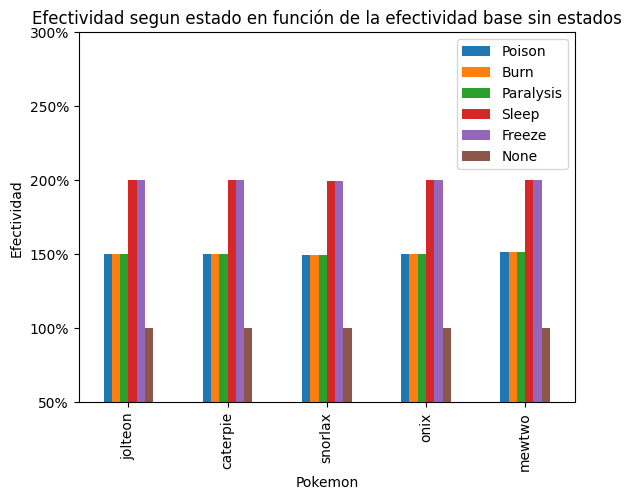

In [193]:
data = {status.name.capitalize(): [] for status in StatusEffect}
for status in StatusEffect:
    pokemons = create_pokemons(status=status)
    base_pokemons = create_pokemons()
    for index, pokemon in enumerate(pokemons):
        base_catch_rate = attempt_catch(base_pokemons[index], "pokeball")[1]
        catch_rate = attempt_catch(pokemon, "pokeball")[1]
        catch_rate = (catch_rate / base_catch_rate) * 100
        data[status.name.capitalize()].append(catch_rate)
    
df = pd.DataFrame(data, index=pokemon_names)
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))

ax = df.plot(kind='bar')
ax.yaxis.set_major_formatter(formatter)
plt.ylabel('Efectividad')
plt.xlabel('Pokemon')
plt.ylim(50, 300)
plt.title("Efectividad segun estado en función de la efectividad base sin estados")
plt.show()    

### Item B TODO noise graph

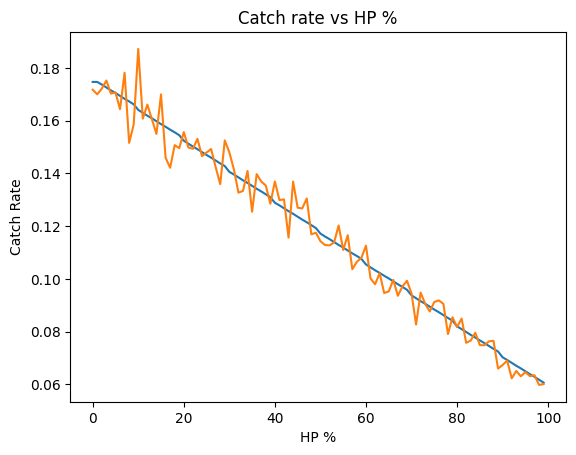

In [221]:
catch_rate = []
catch_rate_noise = []
life_values = range(0,100)
for life in life_values:
    pokemon = factory.create("onix", 100, StatusEffect.NONE, life/100)
    catch_rate.append(attempt_catch(pokemon, "pokeball")[1])
    catch_rate_noise.append(attempt_catch(pokemon, "pokeball", 0.05)[1])

plt.plot(life_values, catch_rate)
plt.plot(life_values, catch_rate_noise)

plt.ylabel('Catch Rate')
plt.xlabel('HP %')
plt.title("Catch rate vs HP %")
plt.show()